# **Object detection using Transfer Learning of CNN architectures**
## **a. Load in a pre-trained CNN model trained on a large dataset**
## **b. Freeze parameters (weights) in model’s lower convolutional layers**
## **c. Add custom classifier with several layers of trainable parameters to model**
## **d. Train classifier layers on training data available for task**
## **e. Fine-tune hyper parameters and unfreeze more layers as needed**

## IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pathlib

In [2]:
Image_Shape = (224,224)

## **a. Load in a pre-trained CNN model trained on a large dataset**

In [3]:
URL_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file(origin = URL_dataset, fname='flower_photos' ,untar= True)

228813984/228813984 [==============================] - 6s 0us/step


In [5]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
'''data_dir = pathlib.Path(data_dir)
file_list = list(data_dir.glob('*/*.jpg'))
half_file_list = file_list[:len(file_list) // 2]
#image_count = len(list(data_dir.glob('*/*.jpg')))
image_count = len(half_file_list)
print(image_count)'''

"data_dir = pathlib.Path(data_dir)\nfile_list = list(data_dir.glob('*/*.jpg'))\nhalf_file_list = file_list[:len(file_list) // 2]\n#image_count = len(list(data_dir.glob('*/*.jpg')))\nimage_count = len(half_file_list)\nprint(image_count)"

In [7]:
flowers_images_dict = {"daisy" : list(data_dir.glob('daisy/*')),
                      "dandelion" : list(data_dir.glob('dandelion/*')),
                      "roses" : list(data_dir.glob('roses/*')),
                      "sunflowers" : list(data_dir.glob('sunflowers/*')),
                      "tulips" : list(data_dir.glob('tulips/*'))}

flowers_labels_dict = {"daisy" : 0,
                       "dandelion" : 1,
                       "roses" : 2,
                       "sunflowers" : 3,
                       "tulips" : 4}

X, Y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, Image_Shape)
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])
X = np.array(X)
Y = np.array(Y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [10]:
tf_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

## **b. Freeze parameters (weights) in model’s lower convolutional layers**
## **c. Add custom classifier with several layers of trainable parameters to the model**

In [11]:
classifier = tf.keras.Sequential([hub.KerasLayer(tf_model, input_shape = (224,224,3), trainable=False),
tf.keras.layers.Dense(len(flowers_labels_dict), activation = "softmax")])

## **e. Fine-tune hyperparameters and unfreeze more layers as needed**

In [12]:
classifier.summary()
classifier.compile(optimizer="adam",
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## **d. Train classifier layers on training data available for the task**

In [13]:
classifier.fit(X_test_scaled, Y_test, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 43s 1s/step - loss: 1.2265 - accuracy: 0.5120
Epoch 2/5
29/29 [==============================] - 33s 1s/step - loss: 0.6316 - accuracy: 0.7734
Epoch 3/5
29/29 [==============================] - 32s 1s/step - loss: 0.4636 - accuracy: 0.8388
Epoch 4/5
29/29 [==============================] - 34s 1s/step - loss: 0.3743 - accuracy: 0.8834
Epoch 5/5
29/29 [==============================] - 31s 1s/step - loss: 0.3259 - accuracy: 0.9063


In [14]:
evaluation_results = classifier.evaluate(X_test_scaled, Y_test)
print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

29/29 [==============================] - 34s 1s/step - loss: 0.2784 - accuracy: 0.9368
Test Loss: 0.27841031551361084
Test Accuracy: 0.9368191957473755


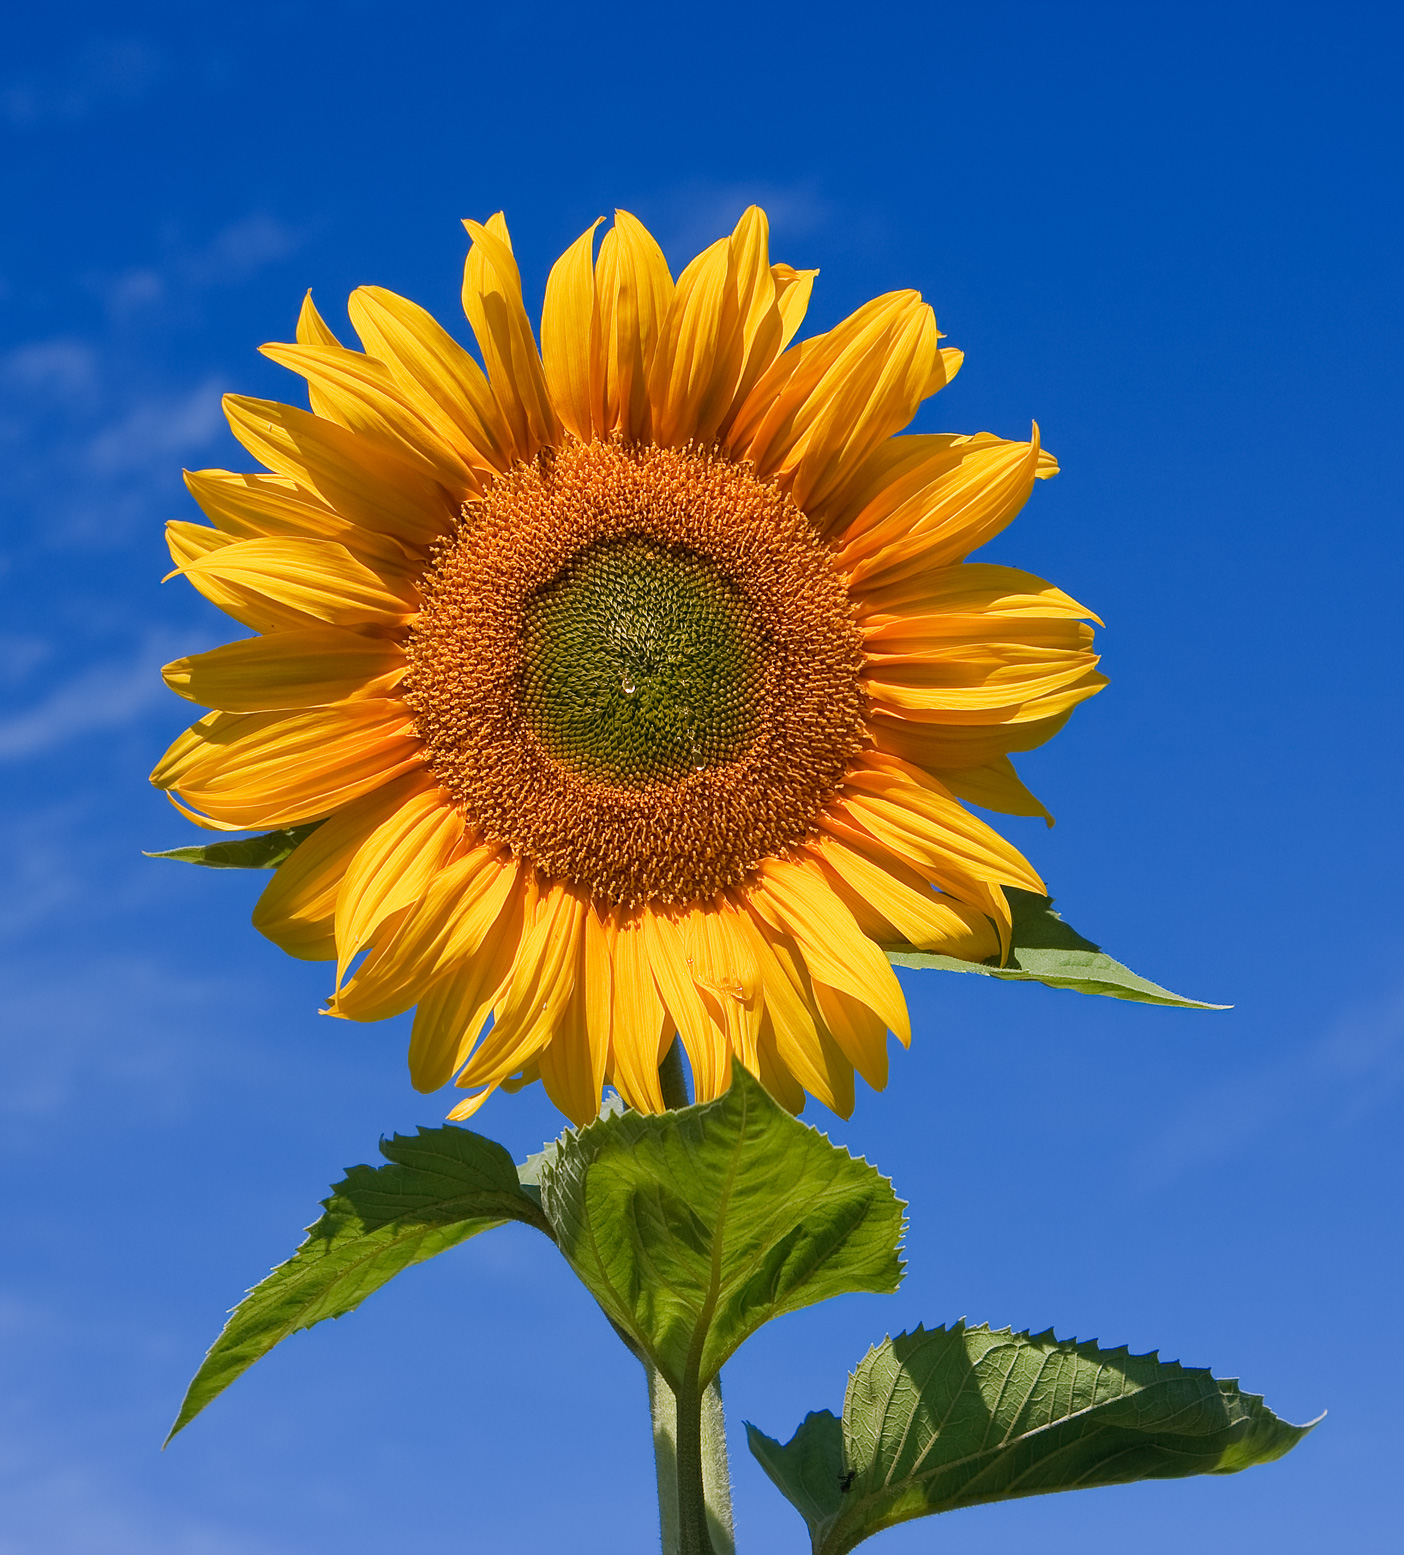

In [19]:
from PIL import Image
img = Image.open("/content/sunflower.jpg")
img

In [20]:
img_array = tf.keras.preprocessing.image.img_to_array(img.resize(Image_Shape))
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
res = classifier.predict(img_array)

In [22]:
predicted_class_index = np.argmax(res)
predicted_class = list(flowers_labels_dict.keys())[predicted_class_index]
print("The predicted class is:", predicted_class)

The predicted class is: sunflowers
